In [1]:
import pandas as pd

df = pd.read_csv("../data/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df["date_added_clean"] = pd.to_datetime(df["date_added"], errors="coerce")
df[["date_added", "date_added_clean"]].head(10)

,date_added,date_added_clean
0,"September 25, 2021",2021-09-25
1,"September 24, 2021",2021-09-24
2,"September 24, 2021",2021-09-24
3,"September 24, 2021",2021-09-24
4,"September 24, 2021",2021-09-24
5,"September 24, 2021",2021-09-24
6,"September 24, 2021",2021-09-24
7,"September 24, 2021",2021-09-24
8,"September 24, 2021",2021-09-24
9,"September 24, 2021",2021-09-24


In [3]:
df["year_added"] = df["date_added_clean"].dt.year
df[["date_added_clean", "year_added"]].head(10)

,date_added_clean,year_added
0,2021-09-25,2021.0
1,2021-09-24,2021.0
2,2021-09-24,2021.0
3,2021-09-24,2021.0
4,2021-09-24,2021.0
5,2021-09-24,2021.0
6,2021-09-24,2021.0
7,2021-09-24,2021.0
8,2021-09-24,2021.0
9,2021-09-24,2021.0


In [4]:
df["date_added_clean"].isna().sum(), df.shape[0]

(np.int64(98), 8807)

In [5]:
df["year_added"].min(), df["year_added"].max()

(2008.0, 2021.0)

In [6]:
year_type_counts = (
    df.dropna(subset=["year_added"])
      .groupby(["year_added", "type"])
      .size()
      .reset_index(name="titles_added")
)

year_type_counts.head(10)

,year_added,type,titles_added
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
7,2013.0,TV Show,4
8,2014.0,Movie,19
9,2014.0,TV Show,4


In [7]:
year_type_counts["year_total"] = (
    year_type_counts
    .groupby("year_added")["titles_added"]
    .transform("sum")
)

year_type_counts["pct_of_year"] = (
    year_type_counts["titles_added"] / year_type_counts["year_total"]
)

year_type_counts.head(10)

,year_added,type,titles_added,year_total,pct_of_year
0,2008.0,Movie,1,2,0.500000
1,2008.0,TV Show,1,2,0.500000
2,2009.0,Movie,2,2,1.000000
3,2010.0,Movie,1,1,1.000000
4,2011.0,Movie,13,13,1.000000
5,2012.0,Movie,3,3,1.000000
6,2013.0,Movie,6,10,0.600000
7,2013.0,TV Show,4,10,0.400000
8,2014.0,Movie,19,23,0.826087
9,2014.0,TV Show,4,23,0.173913


In [8]:
mix = (
    year_type_counts
    .pivot(index="year_added", columns="type", values="pct_of_year")
    .sort_index()
)

mix.head()

type,Movie,TV Show
year_added,,
2008.0,0.5,0.5
2009.0,1.0,NaN
2010.0,1.0,NaN
2011.0,1.0,NaN
2012.0,1.0,NaN


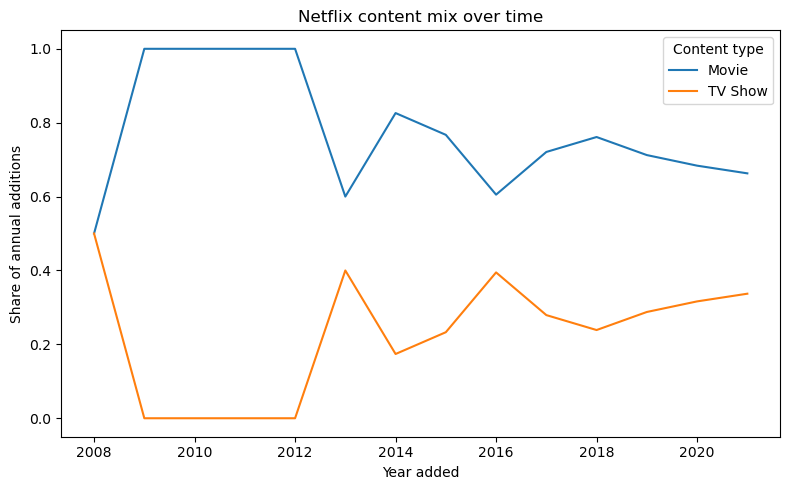

In [10]:
import matplotlib.pyplot as plt

mix = mix.fillna(0)

mix.plot(kind="line", figsize=(8, 5))
plt.title("Netflix content mix over time")
plt.ylabel("Share of annual additions")
plt.xlabel("Year added")
plt.legend(title="Content type")
plt.tight_layout()
plt.show()

In [11]:
year_type_counts.to_csv("../outputs/yearly_content_mix_python.csv", index=False)

plt.figure(figsize=(8, 5))
mix.plot()
plt.title("Netflix content mix over time")
plt.ylabel("Share of annual additions")
plt.xlabel("Year added")
plt.tight_layout()
plt.savefig("../outputs/netflix_content_mix_over_time_python.png", dpi=200)
plt.close()

<Figure size 800x500 with 0 Axes>